In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt


In [ ]:
# submit the form to access and get token to download it
# !curl -X POST -d "form_field=value" "https://www.start.umd.edu/gtd/contact/download?t=eaddf3143f5a11ee86980e5194896103&p=1" -o terrorism.csv


In [ ]:
terrorism_df = pd.read_csv("terrorism.csv", on_bad_lines="skip", encoding='latin-1')
terrorism_df.head()

<ipython-input-3-93318186c62f>:1: DtypeWarning: Columns (4,6,31,33,51,53,54,55,57,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_df = pd.read_csv("terrorism.csv", on_bad_lines="skip", encoding='latin-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
print(f"Shape of Dataset: {terrorism_df.shape}")
feature_cols = terrorism_df.columns.values
print("Columns available: \n", feature_cols)

Shape of Dataset: (131468, 135)
Columns available: 
 ['eventid' 'iyear' 'imonth' 'iday' 'approxdate' 'extended' 'resolution'
 'country' 'country_txt' 'region' 'region_txt' 'provstate' 'city'
 'latitude' 'longitude' 'specificity' 'vicinity' 'location' 'summary'
 'crit1' 'crit2' 'crit3' 'doubtterr' 'alternative' 'alternative_txt'
 'multiple' 'success' 'suicide' 'attacktype1' 'attacktype1_txt'
 'attacktype2' 'attacktype2_txt' 'attacktype3' 'attacktype3_txt'
 'targtype1' 'targtype1_txt' 'targsubtype1' 'targsubtype1_txt' 'corp1'
 'target1' 'natlty1' 'natlty1_txt' 'targtype2' 'targtype2_txt'
 'targsubtype2' 'targsubtype2_txt' 'corp2' 'target2' 'natlty2'
 'natlty2_txt' 'targtype3' 'targtype3_txt' 'targsubtype3'
 'targsubtype3_txt' 'corp3' 'target3' 'natlty3' 'natlty3_txt' 'gname'
 'gsubname' 'gname2' 'gsubname2' 'gname3' 'gsubname3' 'motive'
 'guncertain1' 'guncertain2' 'guncertain3' 'individual' 'nperps'
 'nperpcap' 'claimed' 'claimmode' 'claimmode_txt' 'claim2' 'claimmode2'
 'claimmode2_txt

In [ ]:
# info about dataset
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131468 entries, 0 to 131467
Columns: 135 entries, eventid to related
dtypes: float64(59), int64(18), object(58)
memory usage: 135.4+ MB


In [ ]:
terrorism_df.describe().style.background_gradient("hot")

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,131468.000000,131468.000000,131468.000000,131468.000000,131468.000000,131468.000000,131468.000000,127199.000000,127198.000000,131462.000000,131468.000000,131468.000000,131468.000000,131468.000000,131467.000000,19340.000000,131467.000000,131468.000000,131468.000000,131468.000000,3729.000000,221.000000,131468.000000,125129.000000,130588.000000,6706.000000,6278.000000,6401.000000,754.000000,684.000000,726.000000,131088.000000,755.000000,98.000000,131468.000000,60353.000000,61979.000000,65348.000000,8864.000000,690.000000,290.000000,96.000000,58.000000,4513.000000,131468.000000,116150.000000,8129.000000,7269.000000,1075.000000,973.000000,73.000000,70.000000,124050.000000,67031.000000,65661.000000,120041.000000,66780.000000,64407.000000,131468.000000,47376.000000,22300.000000,131289.000000,8911.000000,8856.000000,2629.000000,4897.000000,72720.000000,1070.000000,284.000000,495.000000,273.000000,6330.000000,5738.000000,131467.000000,131467.000000,131467.000000,131467.000000
mean,199779476093.268127,1997.729645,6.355760,15.380640,0.036047,134.711154,6.701425,22.441231,-658.534537,1.434643,0.066389,0.987647,0.992485,0.892985,-0.796595,1.292968,0.121833,0.910838,0.025915,3.133957,3.407080,4.660633,8.173601,46.419751,127.457270,9.683120,52.547467,133.354945,9.377984,53.203216,134.181818,0.099376,0.328477,0.367347,0.002183,-54.213643,-2.412091,-0.068541,7.055280,0.205797,7.506897,0.583333,7.448276,-6.806337,6.377560,10.911976,6.568336,10.622919,6.758140,11.247688,6.246575,10.842857,2.251294,0.076069,0.282603,3.236403,0.062025,0.042651,-0.242188,3.323560,349469.682007,0.060744,4.042981,-0.512534,-26.806390,-20.705942,-0.143372,3363353.695121,1146753.227641,551232.809657,449.410256,4.463981,-23.601429,-4.634159,-4.585790,0.101349,-3.971377
std,1246305302.366637,12.464271,3.416323,8.829476,0.186407,117.777697,3.012782,20.113816,241655.214114,1.028178,0.293159,0.110455,0.086364,0.309133,2.829344,0.610424,0.327094,0.284979,0.158883,1.845624,2.094601,2.223375,6.652314,31.580698,86.834742,5.848926,26.053888,128.959166,5.885728,26.935766,142.533229,0.299167,0.469971,0.484561,0.046672,288.012590,16.022004,1.398873,2.974883,1.501222,3.218935,0.495595,3.424230,3.918291,2.100037,6.696275,1.945122,7.499087,2.055360,8.116393,1.507212,8.192672,10.610742,7.511514,3.106114,41.404750,4.036171,0.973310,2.822441,0.507072,20499802.017451,0.358257,236.541344,8.240653,93.390481,138.586088,1.187581,32698793.105688,9941427.665595,2901510.735820,4131.352477,2.060711,59.959171,4.544334,4.608218,0.651515,4.686406
min,197000000001.000000,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-86185896.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-99.000000,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-

## Drop column which doesnot give any extra info for analysis

In [ ]:
null_values_count = terrorism_df.isna().sum().values
print("Null values count:")

# key feature for analysis
key_features = []
threshold = 50
print("-"*20)
for (key, value) in zip(feature_cols, null_values_count):
  print(f"{key}:\t{value}")
  if value < threshold:
    key_features.append(key)

Null values count:
--------------------
eventid:	0
iyear:	0
imonth:	0
iday:	0
approxdate:	129789
extended:	0
resolution:	129248
country:	0
country_txt:	0
region:	0
region_txt:	0
provstate:	419
city:	434
latitude:	4269
longitude:	4270
specificity:	6
vicinity:	0
location:	98143
summary:	66129
crit1:	0
crit2:	0
crit3:	0
doubtterr:	1
alternative:	112128
alternative_txt:	112128
multiple:	1
success:	0
suicide:	0
attacktype1:	0
attacktype1_txt:	0
attacktype2:	127739
attacktype2_txt:	127739
attacktype3:	131247
attacktype3_txt:	131247
targtype1:	0
targtype1_txt:	0
targsubtype1:	6339
targsubtype1_txt:	6339
corp1:	42550
target1:	636
natlty1:	880
natlty1_txt:	880
targtype2:	124762
targtype2_txt:	124762
targsubtype2:	125190
targsubtype2_txt:	125190
corp2:	125789
target2:	124886
natlty2:	125067
natlty2_txt:	125067
targtype3:	130714
targtype3_txt:	130714
targsubtype3:	130784
targsubtype3_txt:	130784
corp3:	130864
target3:	130715
natlty3:	130742
natlty3_txt:	130742
gname:	0
gsubname:	127417
gname2:	13

In [ ]:
key_features

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'gname',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'property',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [ ]:
len(key_features)
main_df = terrorism_df[key_features]
main_df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,specificity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,1.0,...,MANO-D,0,13,Unknown,0,PGIS,0.0,0.0,0.0,0.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,1.0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0.0,1.0,1.0,1.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,4.0,...,Unknown,0,13,Unknown,0,PGIS,-9.0,-9.0,1.0,1.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,1.0,...,Unknown,0,6,Explosives,1,PGIS,-9.0,-9.0,1.0,1.0
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,1.0,...,Unknown,0,8,Incendiary,1,PGIS,-9.0,-9.0,1.0,1.0


## Some important information

In [ ]:
decoded_feature = ["iyear", "imonth", "iday", "country_txt", "region_txt", "city"]

for feature in decoded_feature:
  print(f"{feature.upper()} with most attacks: ", terrorism_df[feature].value_counts().index[1])

# other feature explNtion
print("Most Attacks type: ", terrorism_df["attacktype1_txt"].value_counts().index[1])
print("Most Used Attack weapon : ", terrorism_df["weaptype1_txt"].value_counts().index[1])


IYEAR with most attacks:  2012
IMONTH with most attacks:  4
IDAY with most attacks:  15
COUNTRY_TXT with most attacks:  Pakistan
REGION_TXT with most attacks:  South Asia
CITY with most attacks:  Baghdad
Most Attacks type:  Armed Assault
Most Used Attack weapon :  Firearms


## **Data Visualization**

### Word Visualization

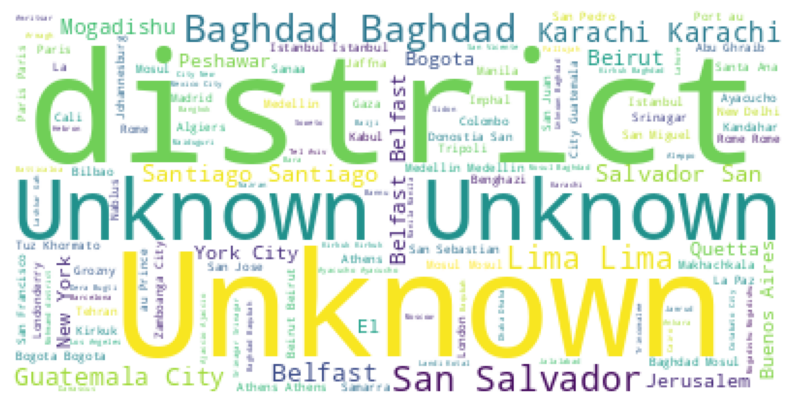

In [ ]:
from wordcloud import WordCloud

# Concatenate the "city" column values into a single string
city_text = " ".join(terrorism_df["city"].dropna())
wordcloud = WordCloud(background_color='white').generate(city_text)

plt.figure(figsize=(10, 10))
plt.axis(False)
plt.imshow(wordcloud)
plt.show()

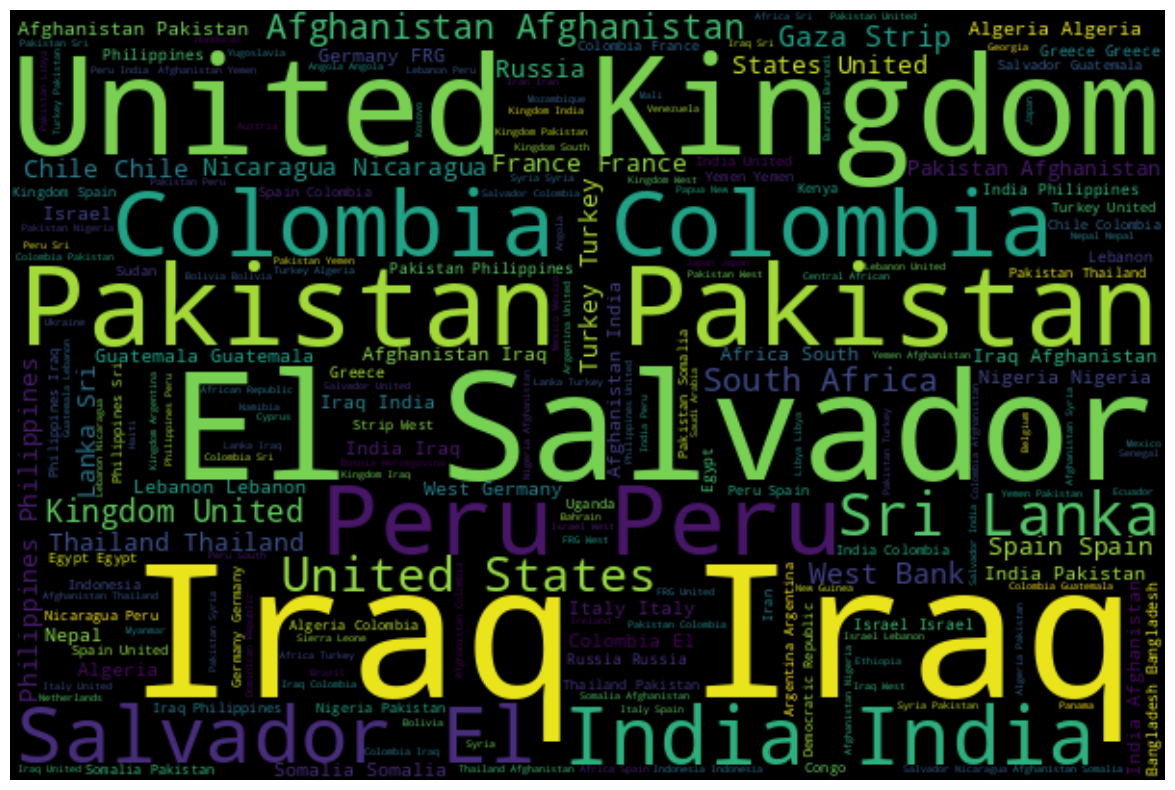

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(WordCloud(width=600, height=400).
           generate(" ".join(terrorism_df["country_txt"].dropna())),
           interpolation="bilinear")
plt.axis(False)
plt.show()

### Bar Plot

##### Terrorism according to year

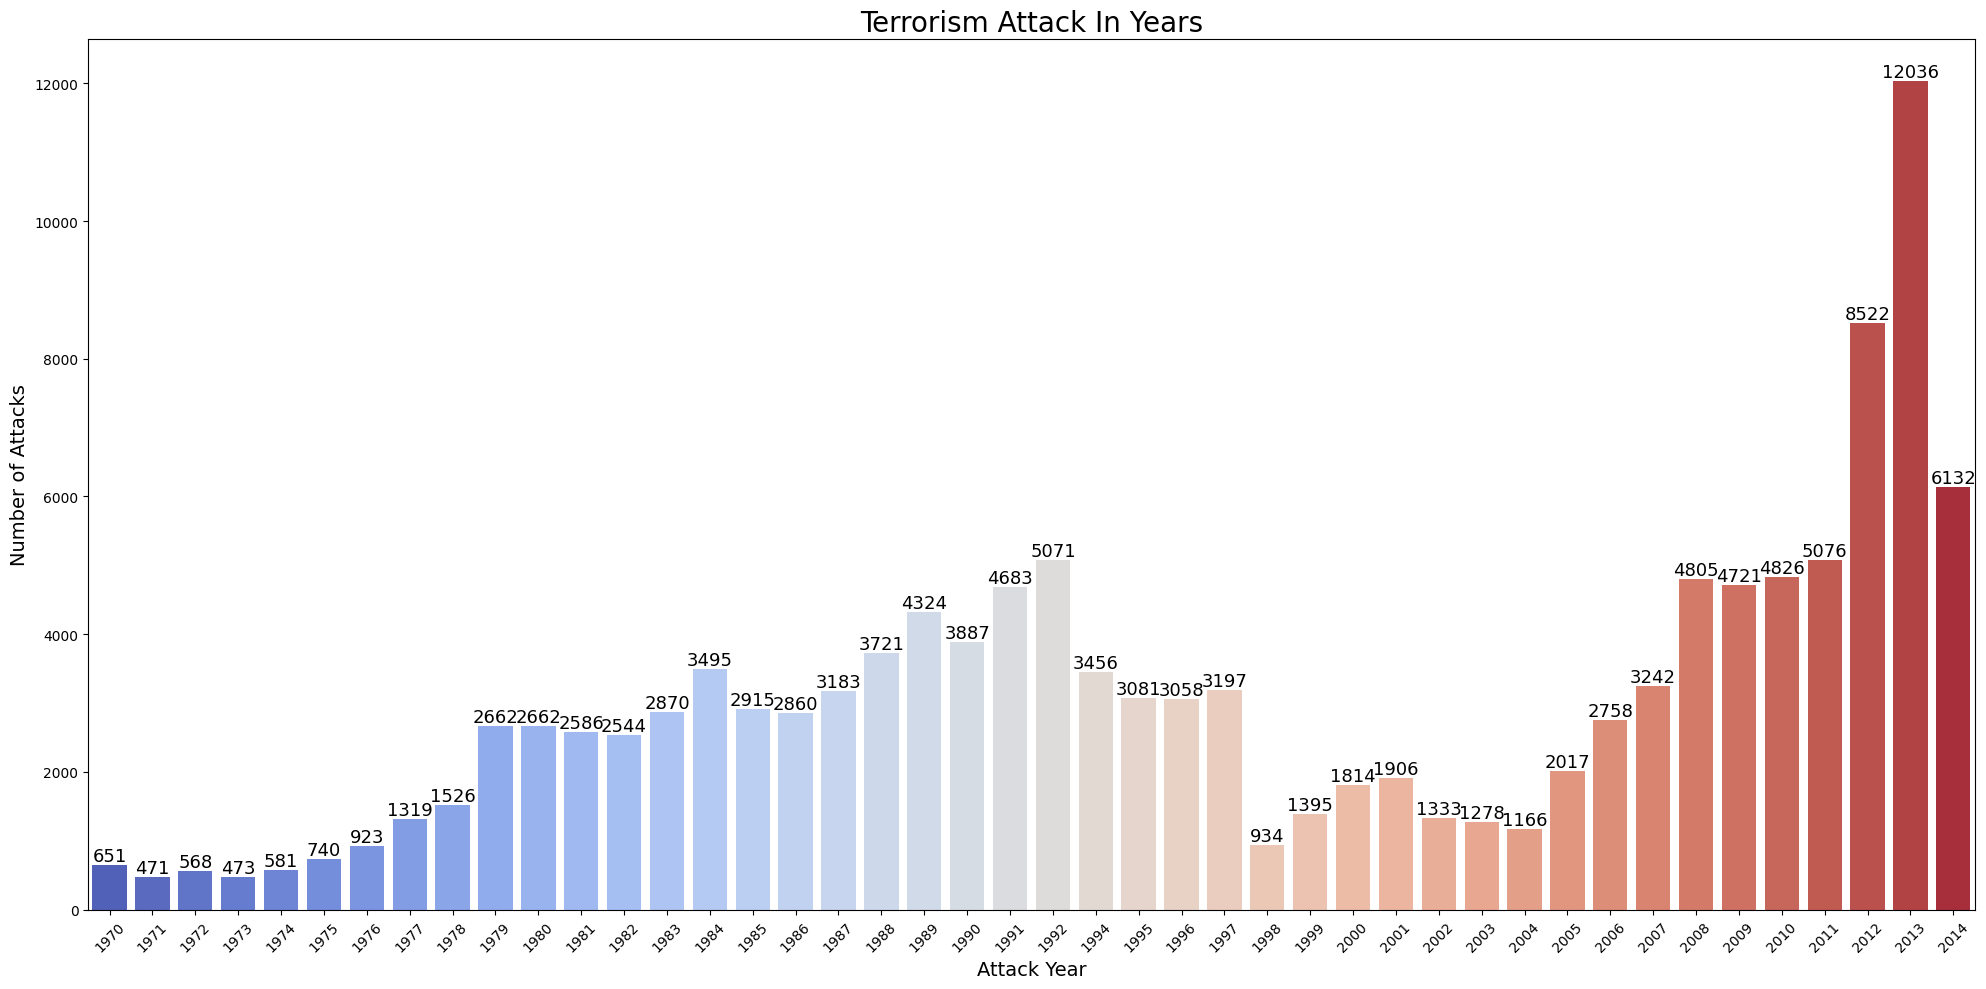

In [ ]:
# get year, count from value_counts and map to x and y axis
x_year = terrorism_df["iyear"].value_counts(dropna=False).sort_index().index
y_count_years = terrorism_df["iyear"].value_counts(dropna=False).sort_index().values

plt.figure(figsize=(20, 10))
plt.title("Terrorism Attack In Years", fontsize=20)
sns.barplot(x=x_year, y=y_count_years, palette='coolwarm')
plt.xlabel("Attack Year", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
# rotate xlabel for better readability
plt.xticks(rotation=45)

# Add text annotation on top of bar
for idx, value in enumerate(y_count_years):
  plt.text(idx, value, str(value), ha="center", va="bottom", fontsize=13)

plt.tight_layout()
plt.show()

##### Terrosism rate in different country


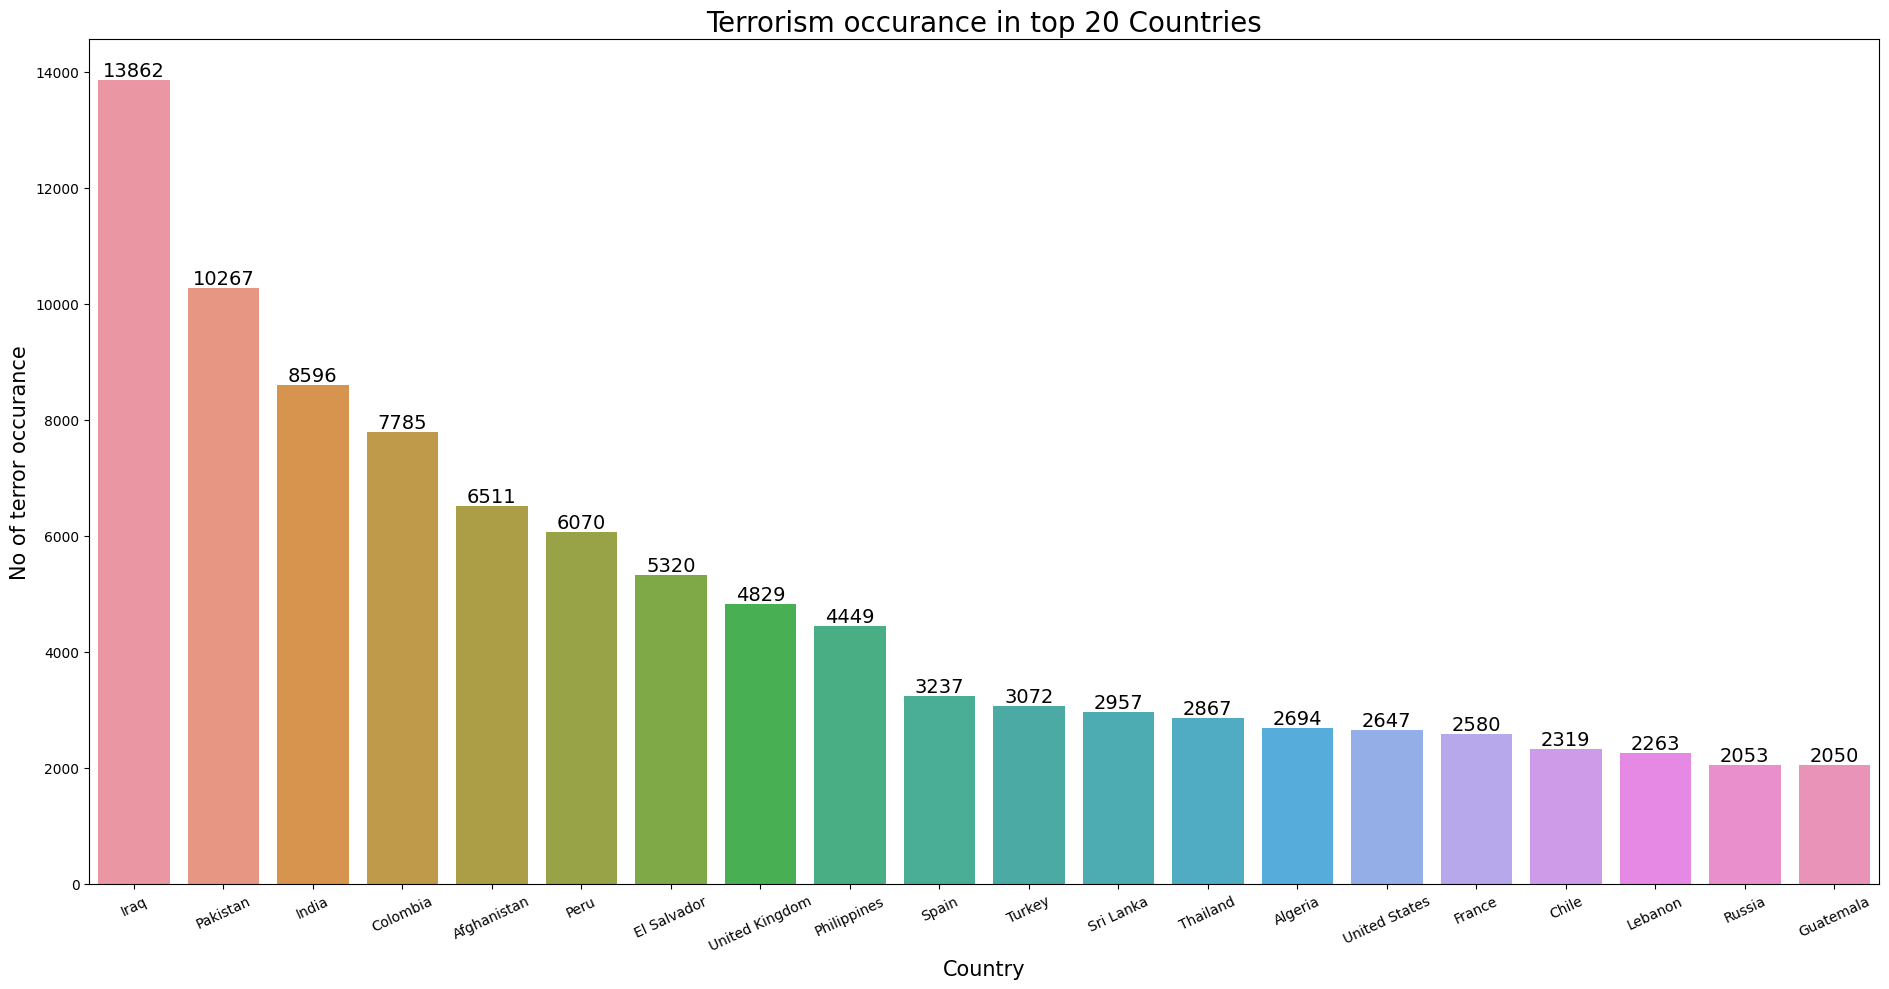

In [ ]:
x_country = terrorism_df["country_txt"].value_counts().sort_values(ascending=False).index[:20]
y_terror_occurance = terrorism_df["country_txt"].value_counts().sort_values(ascending=False).values[:20]

plt.figure(figsize=(19, 10))
sns.barplot(x=x_country, y=y_terror_occurance)
plt.title("Terrorism occurance in top 20 Countries", fontsize=20)
plt.xlabel("Country", fontsize=15)
plt.ylabel("No of terror occurance", fontsize=15)
plt.xticks(rotation=25)

for idx, value in enumerate(y_terror_occurance):
  # ha -> horizontal alignment, va-> vertical alignment
  plt.text(idx, value, str(value), ha="center", va="bottom", fontsize=14)

plt.tight_layout()
plt.show()

### Terrorism activities in specific Month

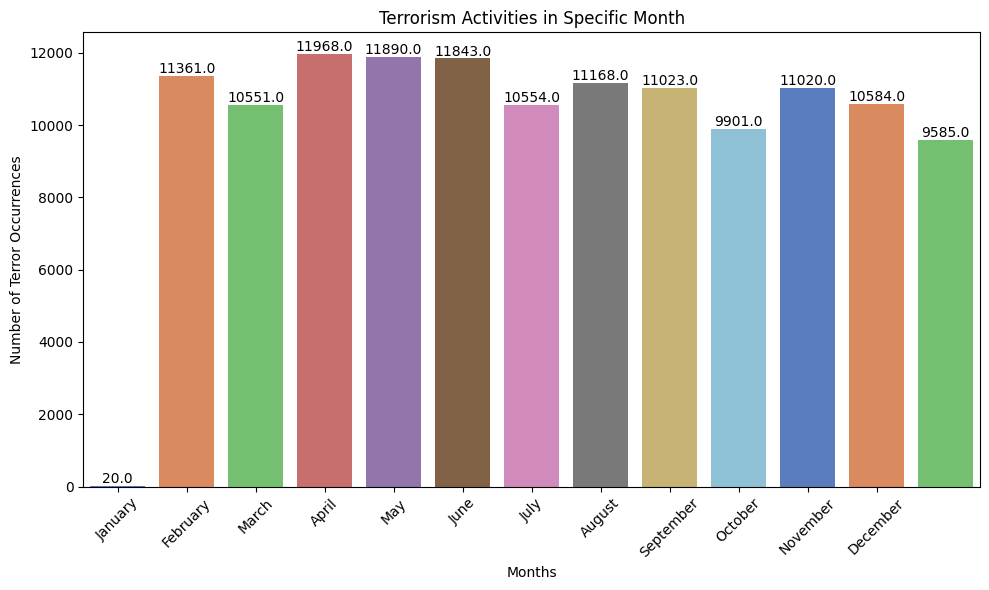

In [ ]:
# list of months
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(10, 6))
ax = sns.countplot(x="imonth", data=terrorism_df, palette="muted")
plt.title("Terrorism Activities in Specific Month")
plt.xlabel("Months")
plt.ylabel("Number of Terror Occurrences")
plt.xticks(np.arange(0, 12, 1), months, rotation=45)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


#### Most attack types in terrorism

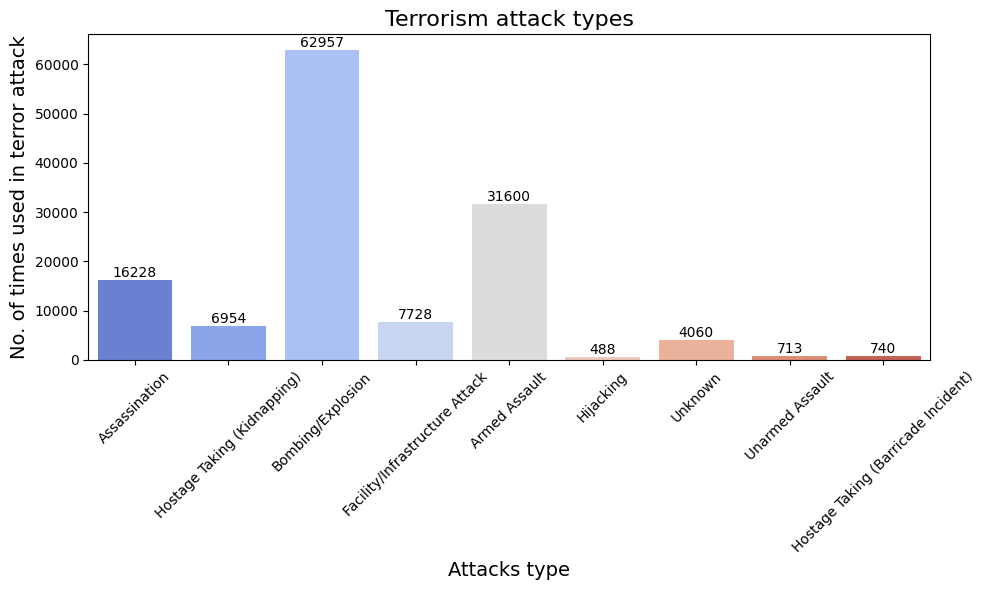

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="attacktype1_txt", data=terrorism_df, palette="coolwarm")
plt.xlabel("Attacks type", fontsize=14)
plt.ylabel("No. of times used in terror attack", fontsize=14)
plt.title("Terrorism attack types", fontsize=16)
plt.xticks(rotation=45)

for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}",
      (p.get_x() + p.get_width() / 2.,
      p.get_height()), xytext=(0, 5),
      ha="center", va="center", color='black',
      textcoords="offset points")

plt.tight_layout()
plt.show()

##### Most weapon used in terrorism

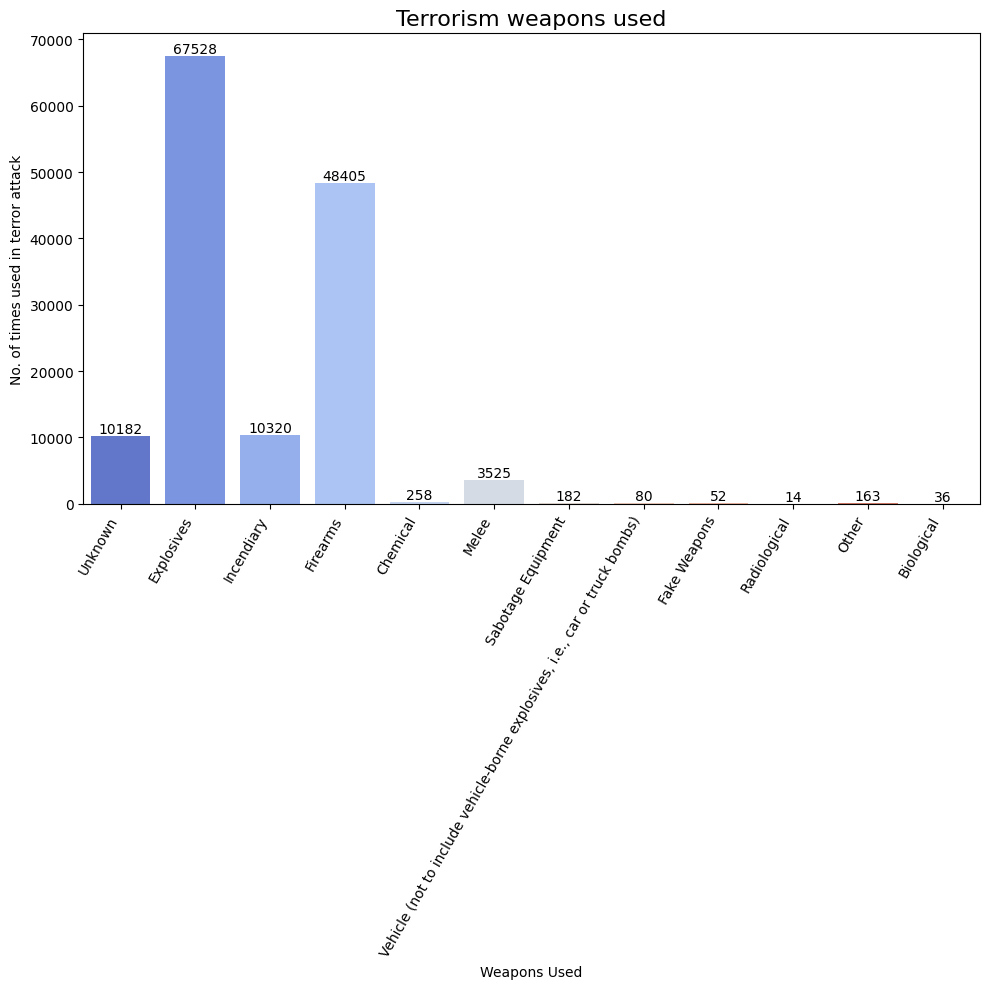

In [ ]:
# Merge data from 'weaptype1_txt' and 'weaptype2_txt' columns
weapon_data =  pd.concat([terrorism_df['weaptype1_txt'],
                          terrorism_df['weaptype2_txt'],
                          terrorism_df['weaptype3_txt'],
                          terrorism_df['weaptype4_txt']], ignore_index=True)

plt.figure(figsize=(10, 10))
ax = sns.countplot(x=weapon_data, palette="coolwarm")
plt.xlabel("Weapons Used")
plt.ylabel("No. of times used in terror attack")
plt.title("Terrorism weapons used", fontsize=16)
plt.xticks(rotation=60, ha="right")
plt.yticks(ha="right")

for p in ax.patches:
  ax.annotate(f"{int(p.get_height())}",
      (p.get_x() + p.get_width() / 2.,
      p.get_height()), xytext=(0, 5),
      ha="center", va="center", color='black',
      textcoords="offset points")

plt.tight_layout()
plt.show()

### Regional plot with year

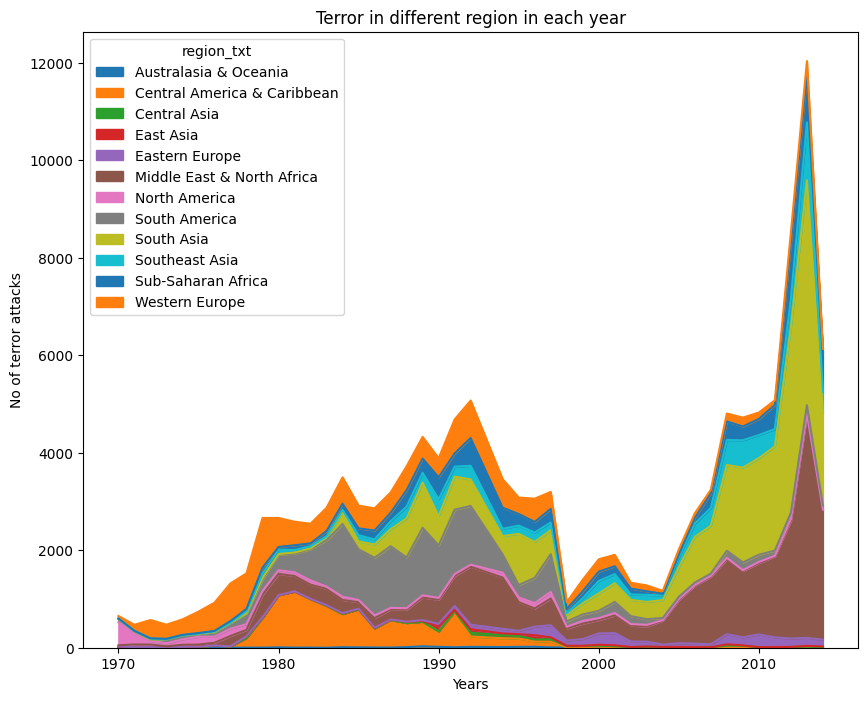

In [ ]:
pd.crosstab(terrorism_df.iyear,
            terrorism_df.region_txt).plot(kind="area",
                                          figsize=(10, 8),
                                          title="Terror in different region in each year",
                                          ylabel="No of terror attacks",
                                          xlabel="Years"
)
plt.show()



#### Reusablility Code for plot

---



---



In [ ]:
def count_plot_by_sort(dataseries,
                      title: str,
                      xlabel: str,
                      ylabel: str,
                      limit: int=None,
                      asce: bool=False,
                      figsize=(19, 10),
                      rotation: int=45,
                      display_count: bool=True):

  plt.figure(figsize=figsize)

  # for sorted construction of plot. Convert series into dataframe
  dummy_col  = "column"
  dataframe = pd.DataFrame(({ dummy_col: dataseries }))

  sorted_df = dataframe[dummy_col].value_counts().sort_values(ascending=asce)
  x = sorted_df.index if limit is None else sorted_df.index[:limit]
  y = sorted_df.values if limit is None else sorted_df.values[:limit]

  ax = sns.barplot(x=x, y=y)
  plt.title(title + " - ", fontsize=20)
  plt.xlabel(xlabel, fontsize=15)
  plt.ylabel(ylabel, fontsize=15)
  plt.xticks(rotation=rotation, ha="right")

  if display_count:
    for idx, value in enumerate(y):
      ax.annotate(f"{int(value)}",
                  (idx, value),
                  xytext=(0, 5),
                  textcoords="offset points",
                  ha="center", va="bottom", fontsize=14, color='black')

  plt.tight_layout()

  plt.show()

In [ ]:
# define function for countplot for reusablility
def count_plot(dataframe, col: str,
                title: str,
                xlabel: str,
                ylabel: str,
                palette="coolwarm",
                figsize: tuple=(10, 6),
                display_value: bool=True,
                rotation: int=45):

  plt.figure(figsize=figsize)
  ax = sns.countplot(x=col, data=dataframe)
  plt.xlabel(xlabel, fontsize=14)
  plt.ylabel(ylabel, fontsize=14)
  plt.title(title, fontsize=16)
  plt.xticks(rotation=rotation, ha="right")

  if display_value:
    for p in ax.patches:
      ax.annotate(f"{int(p.get_height())}",
          (p.get_x() + p.get_width() / 2.,
          p.get_height()), xytext=(0, 5),
          ha="center", va="center", color='black',
          textcoords="offset points")

  plt.tight_layout()
  plt.show()

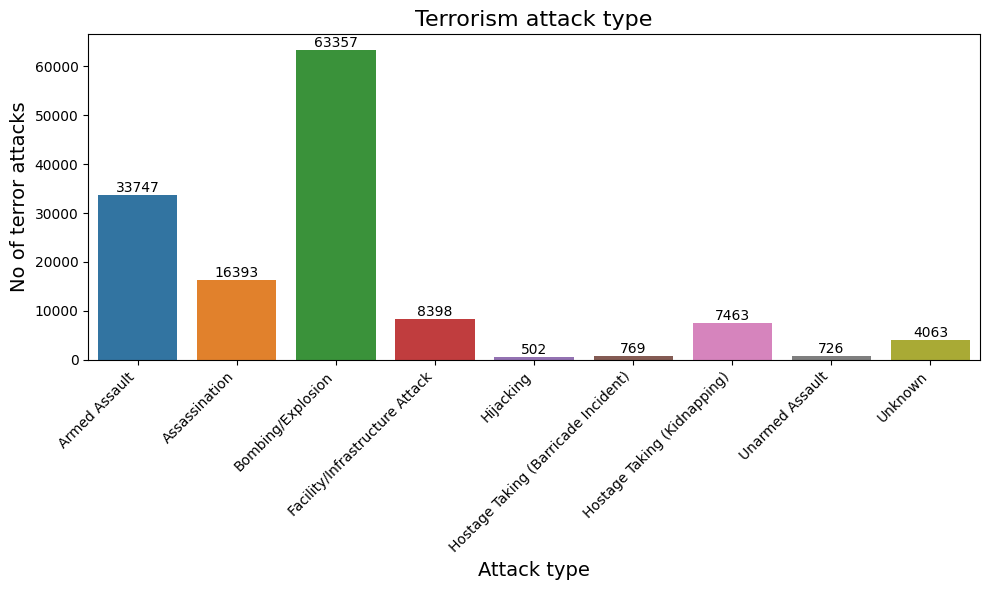

In [ ]:
attack_data = weapon_data =  pd.concat([terrorism_df['attacktype1_txt'],
                                        terrorism_df['attacktype2_txt'],
                                        terrorism_df['attacktype3_txt']], ignore_index=True).sort_values()
count_plot(dataframe=terrorism_df,
          col=attack_data ,
          title="Terrorism attack type",
          xlabel="Attack type",
          ylabel="No of terror attacks")

##### Terrorist target

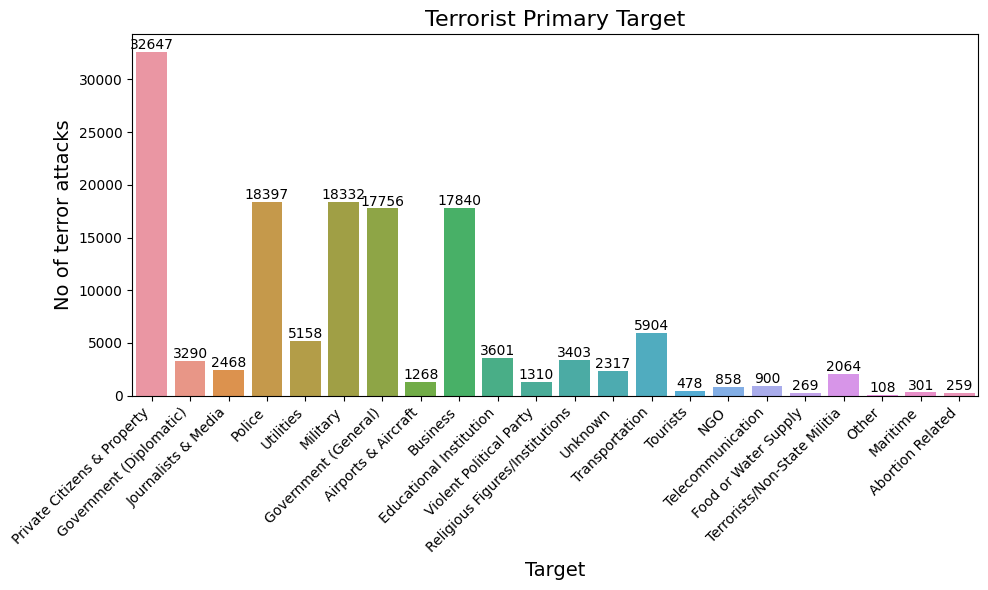

In [ ]:
target_type_data = weapon_data =  pd.concat([terrorism_df['targtype1_txt'],
                                            terrorism_df['targtype2_txt'],
                                            terrorism_df['targtype3_txt']], ignore_index=True)
count_plot(dataframe=terrorism_df, col=target_type_data , title="Terrorist Primary Target", xlabel="Target", ylabel="No of terror attacks")

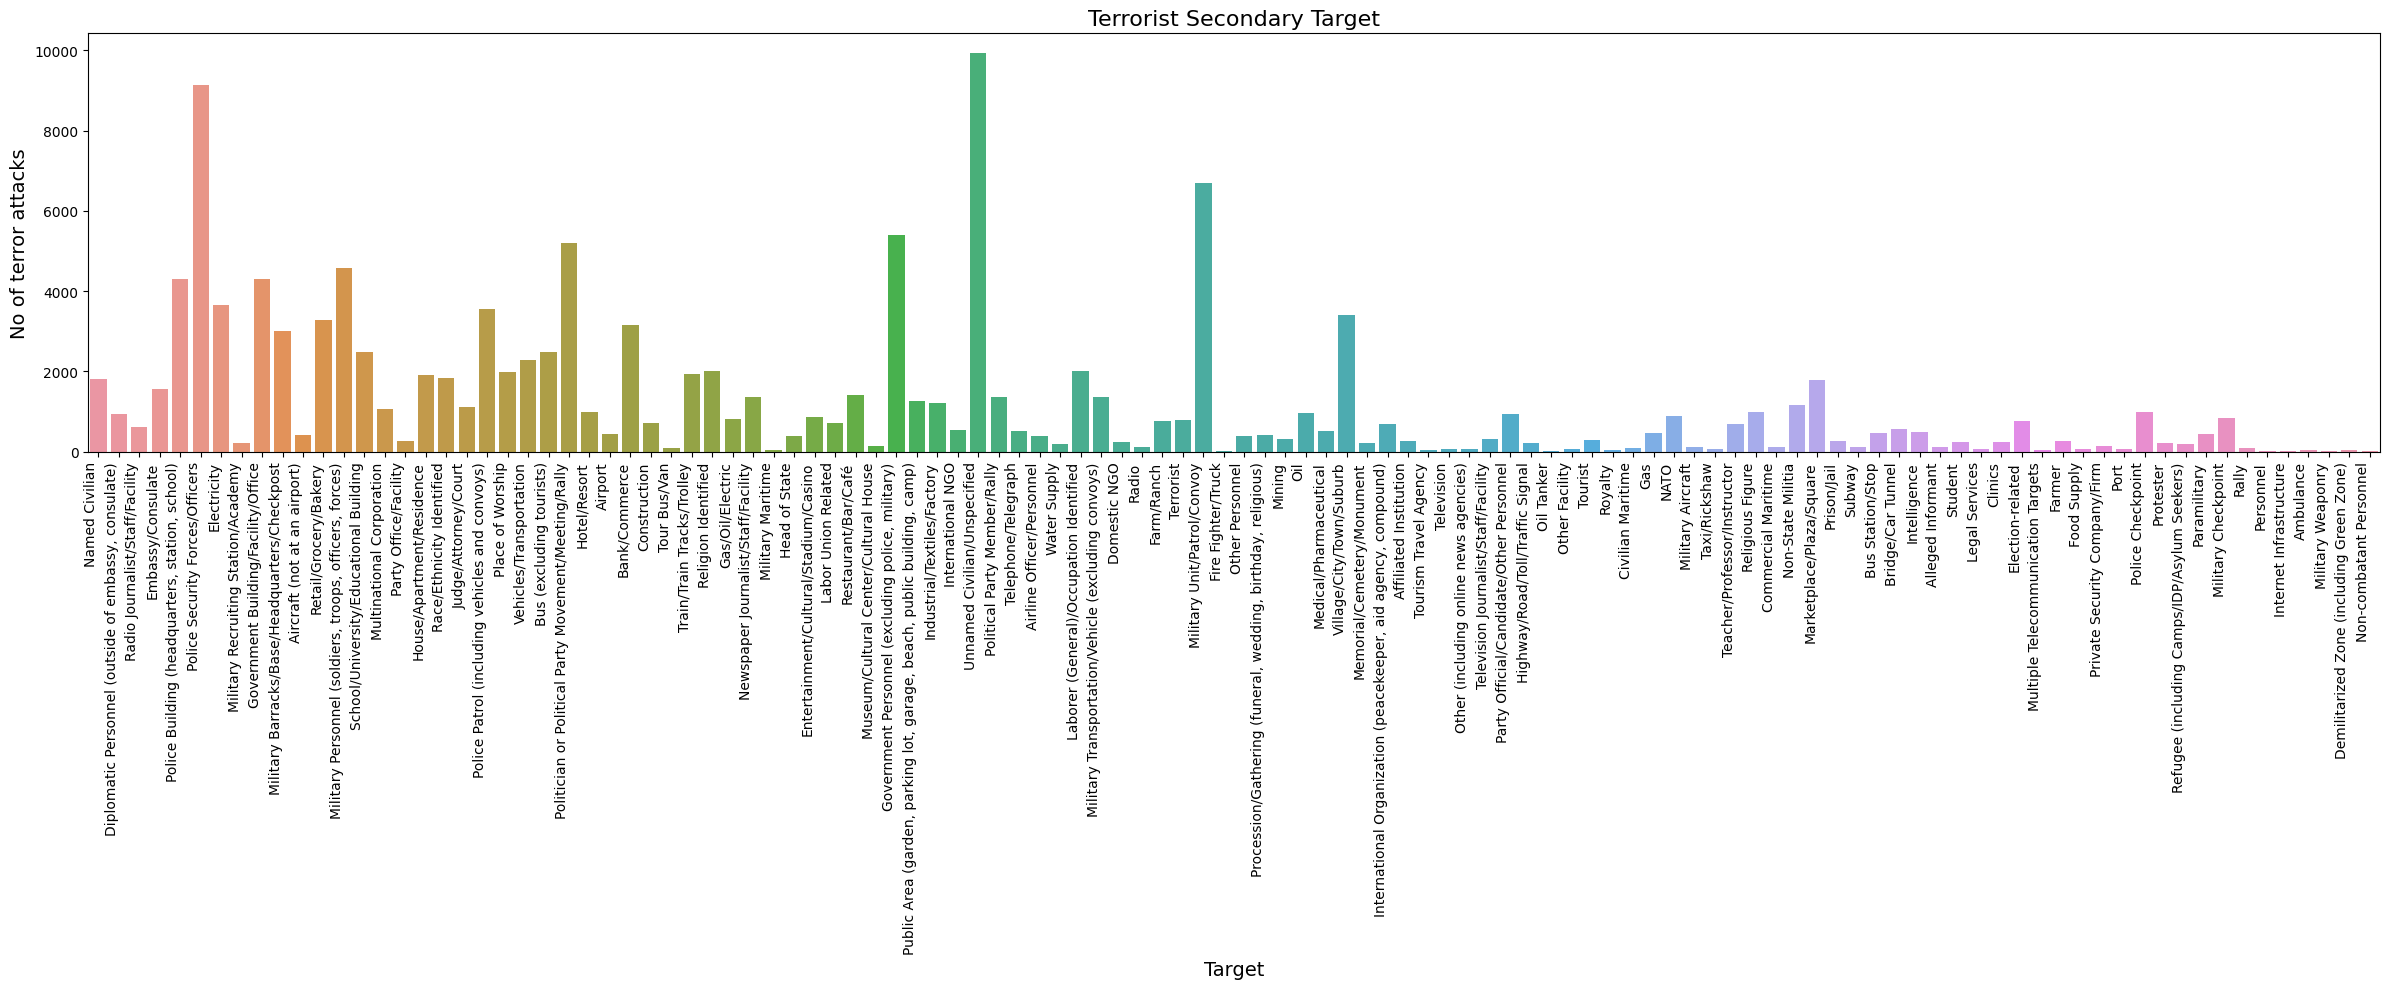

In [ ]:
target_subtype_data = pd.concat([terrorism_df['targsubtype1_txt'],
                                  terrorism_df['targsubtype2_txt'],
                                  terrorism_df['targsubtype3_txt']], ignore_index=True)
count_plot(dataframe=terrorism_df,
          col=target_subtype_data ,
          title="Terrorist Secondary Target",
          xlabel="Target",
          ylabel="No of terror attacks",
          figsize=(24, 10),
          display_value=False,
          rotation=90)

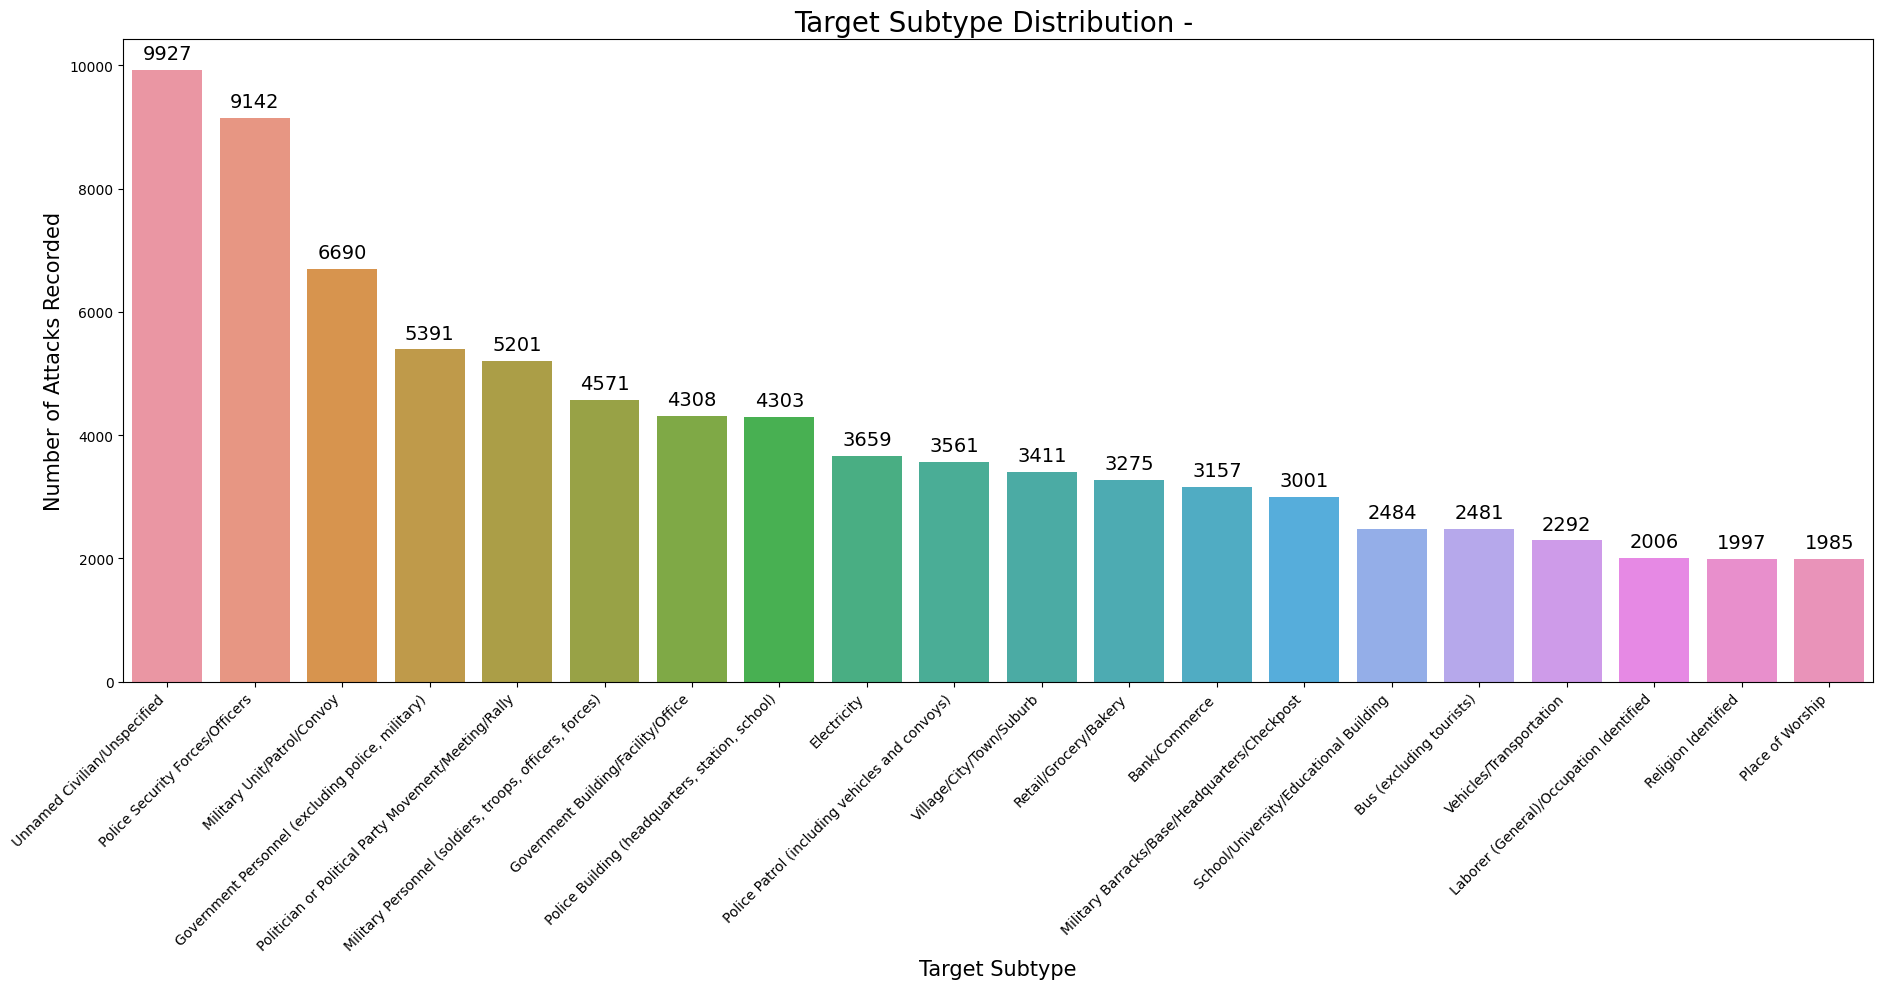

In [37]:
# Usage of sort count plot
count_plot_by_sort(target_subtype_data,
                   title="Target Subtype Distribution",
                   xlabel="Target Subtype",
                   ylabel="Number of Attacks Recorded",
                   limit=20)
